----------------------------------
       1.Data Selection           
----------------------------------

     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0   LP001002    Male      No          0      Graduate            No   
1   LP001003    Male     Yes          1      Graduate            No   
2   LP001005    Male     Yes          0      Graduate           Yes   
3   LP001006    Male     Yes          0  Not Graduate            No   
4   LP001008    Male      No          0      Graduate            No   
5   LP001011    Male     Yes          2      Graduate           Yes   
6   LP001013    Male     Yes          0  Not Graduate            No   
7   LP001014    Male     Yes         3+      Graduate            No   
8   LP001018    Male     Yes          2      Graduate            No   
9   LP001020    Male     Yes          1      Graduate            No   
10  LP001024    Male     Yes          2      Graduate            No   
11  LP001027    Male     Yes          2   

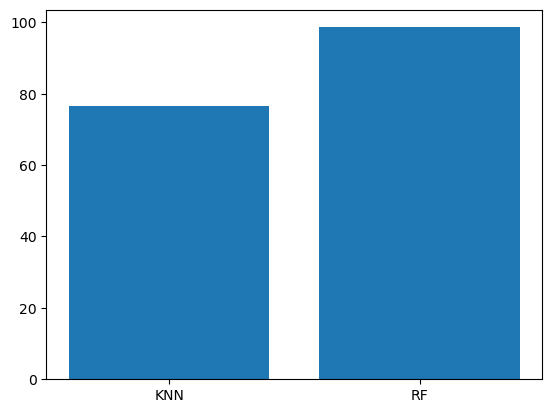

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("Dataset.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))


#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("      Before Checking missing values        ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()
print("--------------------------------------------")
print("      After Checking missing values        ")
print("--------------------------------------------")
print()
data_frame=data_frame.fillna(0)
print(data_frame.isnull().sum())


#===  LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("---------------------------------")
print(" Before label encoding ")
print("---------------------------------")
print()
print(data_frame['Loan_ID'].head(10))

data_frame['Loan_ID']=label_encoder.fit_transform(data_frame['Loan_ID'])
data_frame['Gender']=label_encoder.fit_transform(data_frame['Gender'].astype(str))
data_frame['Married']=label_encoder.fit_transform(data_frame['Married'].astype(str))
data_frame['Education']=label_encoder.fit_transform(data_frame['Education'].astype(str))
data_frame['Dependents']=label_encoder.fit_transform(data_frame['Dependents'].astype(str))

data_frame['Self_Employed']=label_encoder.fit_transform(data_frame['Self_Employed'].astype(str))
data_frame['Property_Area']=label_encoder.fit_transform(data_frame['Property_Area'].astype(str))
data_frame['Loan_Status']=label_encoder.fit_transform(data_frame['Loan_Status'])


print("-------------------------------------------")
print(" After label Encoding ")
print("------------------------------------------")
print()

print(data_frame['Loan_ID'].head(20))


#============================= DATA SPILLTING =========================


X = data_frame.drop("Loan_Status",axis=1)
Y = data_frame["Loan_Status"]

print("----------------------------------------")
print("DATA SPLITTING")
print("------------------------------------")
print()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


print()
print("Total Number Of data      = ", len(X))
print()
print("Total Number Of Test data = ", len(x_test))
print()
print("Total Number Of Train data = ", len(x_train))
print()


#============================= CLASSIFICATION =========================
 
 # === RANDOM FOREST =====

from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators = 10) 
 
# fit the regressor with x and y data
regressor.fit(x_train, y_train) 

Y_pred = regressor.predict(x_train)

from sklearn import metrics

Accuracy_rf=metrics.accuracy_score(y_train,Y_pred)*100
 
 
print("----------------------------------------")
print("RANDOM FORES --> RF")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_rf )
print()
print(metrics.classification_report(y_train,Y_pred))


 # === K NEAREST NEIGHBOUR =====


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
 
# fit the regressor with x and y data
knn.fit(x_train, y_train) 

Y_pred_knn = knn.predict(x_train)

from sklearn import metrics

Accuracy_knn=metrics.accuracy_score(y_train,Y_pred_knn)*100
 
 
print("----------------------------------------")
print("K NEAREST NEIGHBOUR --> KNN")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_knn )
print()
print(metrics.classification_report(y_train,Y_pred_knn))


# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    if Y_pred[i]==0:
        print("-------------------------")
        print([i],"Loan is NOT-APPROVED")
        print("-------------------------")
    else:
        print("-------------------------")
        print([i],"Loan is APPROVED")
        print("-------------------------")        

# ===== COMPARISON =====

vals=[Accuracy_knn,Accuracy_rf]
inds=range(len(vals))
labels=["KNN","RF"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.savefig("Performance")
plt.show()